In [1]:
import numpy as np

1. 收集数据
2. 准备数据，用语言解析数据文件，转换为更易训练的数据结构
3. 分析数据，画画图
4. 训练算法
5. 测试算法
6. 使用算法

In [22]:
# 1. 收集数据忽略，整理成 飞行常客里程数，玩游戏时间占比，每周消费冰激凌公升数，喜欢的类型 用 tab 分割 
# 将原始数据构造成好解析训练的结构
def to_like_score(like_str):
    y = 0
    if like_str == 'largeDoses':
        y = 3
    elif like_str == 'smallDoses':
        y = 2
    elif like_str == 'didntLike':
        y = 1
    return y

def pre_handle(file_name):
    with open("datingTestSet.txt", 'r') as f:
        lines   = f.readlines()
        x_train = np.zeros((len(lines), 3))
        y_train = np.zeros(len(lines))
        x       = 0
        y       = 0
        for raw_line in lines:
            line            = raw_line.strip()
            line_from_split = line.split('\t')
            # 一一赋值
            x_train[x, :]   = list(map(float, line_from_split[:3]))
            y_train[x]      = to_like_score(line_from_split[-1])
            x              += 1
        return x_train, y_train
x_train, y_train = pre_handle("datingTestSet.txt")
print(x_train)
# print(y_train)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]


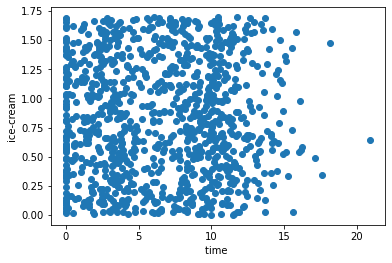

In [59]:
# 分析数据
import matplotlib
import matplotlib.pyplot as plt
from operator import itemgetter

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_train[:, 1], x_train[:, 2])
plt.xlabel('time ')
plt.ylabel('ice-cream')
plt.show()

In [46]:
# 准备数据 归一化
x_train.shape
# axis = 0 沿着 2 维求 min，所以这个维消失，其他维保留，shape = (3,)
x_mins = x_train.min(axis = 0)
x_maxs = x_train.max(axis = 0)
normal = (x_train - x_min) / (x_maxs - x_mins) # 归一化 保证 (0,1) (-1, 1)
# print(np.zeros((2,3)) - [1, 1, 1] )

[[-1. -1. -1.]
 [-1. -1. -1.]]


In [65]:
# knn
def knn(wait_check_X, x_train, y_train, k):
    sqs       = (x_train - wait_check_X) ** 2
    distances = (sqs.sum(axis = 1)) ** 0.5
    sorted_index = distances.argsort()
    class_dict = {}
    for i in range(k):
        index = sorted_index[i]
        y     = int(y_train[index])
        class_dict[y] = class_dict.get(y, 0) + 1
   
    sorted(class_dict.items(), key = itemgetter(1), reverse = True)
    print(class_dict)
knn([0.2, 0.2, 0.3], normal, y_train, 3)


# def predict():

{2: 2, 1: 1}
